# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [ ]:
import os
import numpy
import matplotlib.pyplot as plt
import csv

def load_data(path):
    
#     count = 0
#     for root, dirs, files in os.walk(path):
#         for file in files:
#             if file.endswith(".ppm"):
#                 count = count+1
    count = 0
    dataset = {"features": [], "labels" :[] }
    for root, dirs, files in os.walk(path):
        file_dict = {}
        csvFile = ""
        fileAdded = False
        for file in files:
            if file.endswith(".ppm"):
                #dataset["features"][count] = plt.imread(root+"/"+file)
                dataset["features"].append(plt.imread(root+"/"+file))
                dataset["labels"].append("")
                file_dict[file] = count
                fileAdded = True
                count = count+1
            if file.endswith(".csv"):
                csvFile = root+"/"+file
        if fileAdded: 
            if not csvFile :
                raise ValueError('No CSV file present in the directory: '+ root)
        
            with open(csvFile) as gtFile: # annotations file
                gtReader = csv.reader(gtFile, delimiter=';')
                next(gtReader) # skip header
                # loop over all images in current annotations file
                for row in gtReader:
                    imageIndex = file_dict[row[0]] # the 1th column is the filename
                    dataset["labels"][imageIndex] = row[7] # the 8th column is the label   
                    
    return dataset

            

In [1]:
from sklearn.model_selection import train_test_split


# TODO: Fill this in based on where you saved the training and testing data

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)





Updated Image Shape: (32, 32, 3)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

Updated Image Shape: (32, 32, 3)


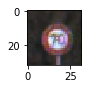

Speed limit (70km/h)


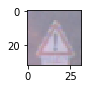

General caution


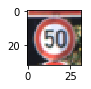

Speed limit (50km/h)


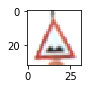

Bumpy road


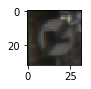

End of no passing by vehicles over 3.5 metric tons


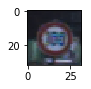

Speed limit (100km/h)


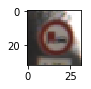

No passing for vehicles over 3.5 metric tons


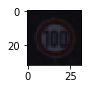

Speed limit (100km/h)


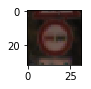

No passing


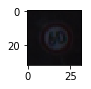

Speed limit (60km/h)


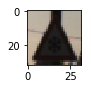

Beware of ice/snow


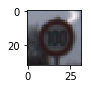

Speed limit (100km/h)


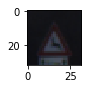

Wild animals crossing


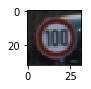

Speed limit (100km/h)


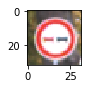

No passing


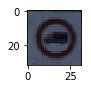

Vehicles over 3.5 metric tons prohibited


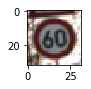

Speed limit (60km/h)


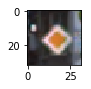

Priority road


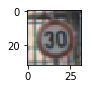

Speed limit (30km/h)


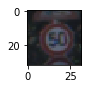

Speed limit (50km/h)


In [94]:
import random
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

labelPath = "signnames.csv"
labels = {}

with open(labelPath) as gtFile: # annotations file
    gtReader = csv.reader(gtFile, delimiter=',')
    next(gtReader) # skip header
    # loop over all labels
    for row in gtReader:
        label = row[0]
        name  = row[1]
        labels[int(label)] = name

print("Updated Image Shape: {}".format(X_train[0].shape))

sampleSize = 20

for index in random.sample(range(1, len(X_train)), sampleSize):
    #index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    print(labels[y_train[index]])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [106]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [107]:
import tensorflow as tf



## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [141]:
from tensorflow.contrib.layers import flatten


def LeNet(x, keep_prob, normalize, greyscale):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    conv_r = 5
    conv_c = 5
    
    # normalization
    if normalize:
        x = tf.nn.l2_normalize(x, dim=1)
        x = tf.nn.l2_normalize(x, dim=2)
    
    if greyscale:
        x  = tf.image.rgb_to_grayscale(x)
        # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    else:
        # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    
    conv1_b = tf.Variable(tf.zeros(6))
    
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1_W, conv1_b

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [142]:
EPOCHS = 30
BATCH_SIZE = 128

rate = 0.001

# Training Pipeline

def train(X_train, y_train, kp=1, normalize=False, regularization=False, greyscale=False, save=False):
    #X_train = (X_train - 128)/128
    
    
    
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    keep_prob = tf.placeholder(tf.float32, (None)) # probablity for the first layer output to be kept
    one_hot_y = tf.one_hot(y, 43)

    logits, conv1_W, conv1_b = LeNet(x, keep_prob, normalize, greyscale)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)

    # add regularisation here ?
    if regularization :
        loss_operation = tf.reduce_mean(loss_operation + conv1_b * tf.nn.l2_loss(conv1_W))

    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

    # Model Evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

    # Training
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        #print("Training...")
        #print()
        accuracies = []
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                # a dropout of 0.5 is supposed to give the highest variance for this distribution
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp})

            validation_accuracy = evaluate(X_valid, y_valid)
            accuracies.append(validation_accuracy)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            #print()
        if save:
            saver.save(sess, './lenet')
            print("Model saved")
        return accuracies
    
#print("no changes")
#print(train(X_train, y_train))

# print("dropout 0.5")
# print(train(X_train, y_train, kp = 0.5))

# print("normalization")
# print(train(X_train, y_train, normalize = True))

# print("l2 regularization")
# print(train(X_train, y_train, regularization = True))

# print("greyscale")
# print(train(X_train, y_train, greyscale = True))

print("normalization + dropout + greyscale")
print(train(X_train, y_train, normalize = True, kp = 0.5, greyscale=True))

# print("normalization + greyscale")
# print(train(X_train, y_train, normalize = True, greyscale=True))

#print("normalization + dropout")
#print(train(X_train, y_train, normalize = False, kp = 0.5))

# print("normalization + dropout")
# print(train(X_train, y_train, normalize = True, kp = 0.7))

# print("normalization + dropout")
# print(train(X_train, y_train, normalize = True, kp = 0.9))


normalization + dropout + greyscale
EPOCH 1 ...
Validation Accuracy = 0.609
EPOCH 2 ...
Validation Accuracy = 0.763
EPOCH 3 ...
Validation Accuracy = 0.826
EPOCH 4 ...
Validation Accuracy = 0.841
EPOCH 5 ...
Validation Accuracy = 0.859
EPOCH 6 ...
Validation Accuracy = 0.870
EPOCH 7 ...
Validation Accuracy = 0.875
EPOCH 8 ...
Validation Accuracy = 0.889
EPOCH 9 ...
Validation Accuracy = 0.901
EPOCH 10 ...
Validation Accuracy = 0.900
EPOCH 11 ...
Validation Accuracy = 0.897
EPOCH 12 ...
Validation Accuracy = 0.895
EPOCH 13 ...
Validation Accuracy = 0.905
EPOCH 14 ...
Validation Accuracy = 0.910
EPOCH 15 ...
Validation Accuracy = 0.893
EPOCH 16 ...
Validation Accuracy = 0.895
EPOCH 17 ...
Validation Accuracy = 0.915
EPOCH 18 ...
Validation Accuracy = 0.921
EPOCH 19 ...
Validation Accuracy = 0.906
EPOCH 20 ...
Validation Accuracy = 0.916
EPOCH 21 ...
Validation Accuracy = 0.898
EPOCH 22 ...
Validation Accuracy = 0.916
EPOCH 23 ...
Validation Accuracy = 0.912
EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [128]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet


KeyboardInterrupt: 